In [ ]:
pip install openai==0.28

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.71.0
    Uninstalling openai-1.71.0:
      Successfully uninstalled openai-1.71.0


we have all the 20 .rar files copied in drive, converting them to csv files

In [ ]:
# Step 0: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 1: Install required packages for RAR extraction
!apt-get install unrar -y
!pip install rarfile

# Step 2: Define input and output folders
import os

input_folder = "/content/drive/MyDrive/AIPM/battery-charging-data/"
output_folder = "/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/"

# Create the output folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Step 3: List all RAR files in the input folder
rar_files = [f for f in os.listdir(input_folder) if f.endswith(".rar")]
print("RAR files found:", rar_files)

# Step 4: Extract each RAR file into the output folder
import rarfile

for rar_file in rar_files:
    rar_path = os.path.join(input_folder, rar_file)
    try:
        with rarfile.RarFile(rar_path) as rf:
            rf.extractall(path=output_folder)
            print(f"Extracted {rar_file} to {output_folder}")
    except Exception as e:
        print(f"Error extracting {rar_file}: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.
RAR files found: ['#3.rar', '#14.rar', '#12.rar', '#6.rar', '#11.rar', '#1.rar', '#8.rar', '#20.rar', '#10.rar', '#19.rar', '#17.rar', '#2.rar', '#5.rar', '#4.rar', '#7.rar', '#13.rar', '#16.rar', '#15.rar', '#9.rar', '#18.rar']
Extracted #3.rar to /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/
Extracted #14.rar to /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/
Extracted #12.rar to /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/
Extracted #6.rar to /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/
Extracted #11.rar to /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/
Extracted #1.ra

combine all the csv files into one combined file

In [ ]:
import os
import pandas as pd

# Define the folder containing the extracted CSV files
csv_folder = "/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/"

# List all CSV files in the folder
csv_files = [os.path.join(csv_folder, f) for f in os.listdir(csv_folder) if f.endswith(".csv")]
print("CSV files found:", csv_files)

# Read each CSV file and store in a list
dfs = []
for file in csv_files:
    try:
        df_temp = pd.read_csv(file)
        dfs.append(df_temp)
        print(f"Loaded {file} with shape: {df_temp.shape}")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Concatenate all DataFrames if any CSV files were loaded
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Combined DataFrame shape:", combined_df.shape)

    # Define the output path for the common CSV file
    output_csv = os.path.join(csv_folder, "combined_battery_data.csv")

    # Save the combined DataFrame to CSV
    combined_df.to_csv(output_csv, index=False)
    print("Combined CSV file saved to:", output_csv)
else:
    print("No CSV files found in the folder.")

CSV files found: ['/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#3.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#14.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#12.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#6.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#11.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#1.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#8.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#20.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#10.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#19.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#17.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#2.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#5.csv', '/content/drive/MyDrive/AIPM/battery-charging-data/cleandata/#4.c

Actual code, auto label using autoGen

Precheck & Install Required Packages

In [5]:
# Precheck: Install required packages (if not already installed)
!pip install --upgrade pandas numpy matplotlib openai
!apt-get install unrar -y
!pip install rarfile

  Using cached openai-1.71.0-py3-none-any.whl.metadata (25 kB)
Using cached openai-1.71.0-py3-none-any.whl (598 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.28.0
    Uninstalling openai-0.28.0:
      Successfully uninstalled openai-0.28.0
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 30 not upgraded.


Mount Google Drive & Load OpenAI API Key

In [7]:
pip install openai==0.28

  Using cached openai-0.28.0-py3-none-any.whl.metadata (13 kB)
Using cached openai-0.28.0-py3-none-any.whl (76 kB)
  Attempting uninstall: openai
    Found existing installation: openai 1.71.0
    Uninstalling openai-1.71.0:
      Successfully uninstalled openai-1.71.0


In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
import openai

# Set file paths based on your structure
base_folder = "/content/drive/MyDrive/AIPM"
key_file_path = os.path.join(base_folder,  "openai_key.txt")

# Load and set OpenAI API key
with open(key_file_path, "r") as f:
    api_key = f.read().strip()
openai.api_key = api_key
print("OpenAI API key loaded and set.")

# Test the API key with a simple GPT-4 request
response = openai.ChatCompletion.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello, world!"}],
    max_tokens=50
)
print("API Test Response:", response.choices[0].message.content)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
OpenAI API key loaded and set.
API Test Response: Hello! How can I assist you today?


Load Battery-Charging Data

In [2]:
import pandas as pd

# Define the data file path
data_file_path = os.path.join(base_folder, "battery-charging-data", "cleandata", "combined_battery_data.csv")

def load_data(file_path=data_file_path):
    print(f"Loading data from {file_path}...")
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully. Shape: {df.shape}")
    print("Columns in the dataframe:", df.columns.tolist())
    return df

df = load_data()

# Optionally, sample some rows for testing
sampled_df = df.sample(n=min(10, len(df)), random_state=42)
print("Sampled data preview:")
print(sampled_df.head())

Loading data from /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/combined_battery_data.csv...
Data loaded successfully. Shape: (23176965, 11)
Columns in the dataframe: ['Unnamed: 0', 'record_time', 'soc', 'pack_voltage (V)', 'charge_current (A)', 'max_cell_voltage (V)', 'min_cell_voltage (V)', 'max_temperature (℃)', 'min_temperature (℃)', 'available_energy (kw)', 'available_capacity (Ah)']
Sampled data preview:
          Unnamed: 0     record_time   soc  pack_voltage (V)  \
15965559      721023  20210623090759  28.0             326.7   
6854669       347838  20200826142327  67.2             354.4   
19579297      241784  20200119180836  49.2             338.2   
11721029      420200  20200820202906  86.0             371.6   
20941270      794287  20210909091932  29.6             330.3   

          charge_current (A)  max_cell_voltage (V)  min_cell_voltage (V)  \
15965559             0.00000                 3.633                 3.624   
6854669            -70.00000       

Define Battery Context and Summarization

In [3]:
import json

def get_battery_context():
    return (
        "The battery-charging dataset is for on-road electric vehicles collected over 29 months from 20 commercial EVs. "
        "Data is recorded every 8 seconds via CAN communication and includes measurements such as 'record_time' (timestamp), "
        "'soc' (state of charge), 'pack_voltage (V)' (battery voltage), and 'charge_current (A)' (charging current), "
        "as well as temperature readings. In normal_charging events, the voltage is relatively stable with moderate current; "
        "fast_charging events exhibit higher current peaks; anomalous_charging or fault_condition events show irregular patterns. "
        "This dataset is used for analyzing charging behavior and predicting battery capacity degradation."
    )

battery_context = get_battery_context()

def get_possible_charging_labels():
    return (
        "Possible labels: 'normal_charging', 'fast_charging', 'anomalous_charging', 'fault_condition'."
    )

possible_labels = get_possible_charging_labels()

def summarize_battery_data(df):
    """Create a summary of key battery metrics (mean, std, min, max, trend) and include sample records."""
    summary = {}
    for col in ['voltage', 'current', 'temperature', 'state_of_charge']:
        if col in df.columns:
            col_data = df[col].dropna()
            if len(col_data) > 1:
                trend = round(float(col_data.iloc[-1] - col_data.iloc[0]) / (len(col_data) - 1), 2)
            else:
                trend = 0
            summary[col] = {
                "mean": round(float(col_data.mean()), 2),
                "std": round(float(col_data.std()), 2),
                "min": round(float(col_data.min()), 2),
                "max": round(float(col_data.max()), 2),
                "trend": trend
            }
    sample_indices = [0, len(df)//2, -1] if len(df) >= 3 else list(range(len(df)))
    summary["samples"] = df.iloc[sample_indices].to_dict("records")
    return json.dumps(summary, indent=2)

battery_summary = summarize_battery_data(df)
print("Battery data summary created.")
print(battery_summary)

Battery data summary created.
{
  "samples": [
    {
      "Unnamed: 0": 0,
      "record_time": 20190726190805,
      "soc": 5.2,
      "pack_voltage (V)": 316.1,
      "charge_current (A)": -8.200012,
      "max_cell_voltage (V)": 3.518,
      "min_cell_voltage (V)": 3.502,
      "max_temperature (\u2103)": 39,
      "min_temperature (\u2103)": 38,
      "available_energy (kw)": 2.27,
      "available_capacity (Ah)": 6.82
    },
    {
      "Unnamed: 0": 287653,
      "record_time": 20200403075248,
      "soc": 22.0,
      "pack_voltage (V)": 330.0,
      "charge_current (A)": -70.10001,
      "max_cell_voltage (V)": 3.69,
      "min_cell_voltage (V)": 3.664,
      "max_temperature (\u2103)": 22,
      "min_temperature (\u2103)": 21,
      "available_energy (kw)": 9.349999,
      "available_capacity (Ah)": 28.14
    },
    {
      "Unnamed: 0": 569405,
      "record_time": 20210517103039,
      "soc": 32.8,
      "pack_voltage (V)": 332.2,
      "charge_current (A)": -68.89999,
     

Create the Prompt for Battery Data

In [4]:
def get_battery_context():
    return (
        "The battery charging dataset contains field data collected from on-road electric vehicles over 29 months "
        "from 20 commercial EVs. Data, recorded every 8 seconds via CAN communication, includes measurements such as "
        "'record_time' (timestamp), 'soc' (state of charge), 'pack_voltage (V)' (voltage), and 'charge_current (A)'. "
        "In normal_charging events, the voltage remains relatively stable with minor fluctuations, whereas fast_charging "
        "events show higher current and possibly rapid voltage increases. Anomalous or fault conditions exhibit irregular "
        "patterns or extreme values. This information is used to analyze charging behavior and predict battery degradation."
    )

def summarize_battery_data(df):
    """Create a summary of key battery metrics (mean, std, min, max, trend) and include sample records."""
    summary = {}
    # Map the dataset columns to simpler metric names
    metric_map = {
        'pack_voltage (V)': 'voltage',
        'charge_current (A)': 'current',
        'soc': 'state_of_charge',
        'max_temperature (℃)': 'temperature'  # Optionally merge with min_temperature if desired
    }
    for col, metric in metric_map.items():
        if col in df.columns:
            col_data = df[col].dropna()
            if len(col_data) > 1:
                trend = round(float(col_data.iloc[-1] - col_data.iloc[0]) / (len(col_data) - 1), 2)
                pct25 = round(float(col_data.quantile(0.25)), 2)
                pct75 = round(float(col_data.quantile(0.75)), 2)
            else:
                trend = pct25 = pct75 = 0
            summary[metric] = {
                "mean": round(float(col_data.mean()), 2),
                "std": round(float(col_data.std()), 2),
                "min": round(float(col_data.min()), 2),
                "max": round(float(col_data.max()), 2),
                "trend": trend,
                "25th_percentile": pct25,
                "75th_percentile": pct75,
                "range": round(float(col_data.max() - col_data.min()), 2)
            }
    sample_indices = [0, len(df)//2, -1] if len(df) >= 3 else list(range(len(df)))
    summary["samples"] = df.iloc[sample_indices].to_dict("records")
    return json.dumps(summary, indent=2)

def create_prompt_for_battery_data(df):
    summary = summarize_battery_data(df)
    prompt = (
        f"{battery_context}\n\n"
        f"Possible labels:\n{possible_labels}\n\n"
        f"Data Summary:\n{summary}\n\n"
        "Based on the above battery data summary, select the most appropriate charging event label from these options: "
        "'normal_charging', 'fast_charging', 'anomalous_charging', or 'fault_condition'. "
        "If the data does not provide sufficient clues, respond with 'insufficient_data'. "
        "Respond ONLY with the label in plain text."
    )
    return prompt

In [5]:
def create_prompt_for_battery_data(df):
    """Creates a prompt using battery context, possible labels, and the summarized dataset."""
    summary = summarize_battery_data(df)
    prompt = (
        f"{battery_context}\n\n"
        f"Possible labels:\n{possible_labels}\n\n"
        f"Data Summary:\n{summary}\n\n"
        "Based on the above battery data summary, select the most appropriate charging event label from these options: "
        "'normal_charging', 'fast_charging', 'anomalous_charging', or 'fault_condition'. "
        "If the data does not provide sufficient clues, respond with 'insufficient_data'. "
        "Respond ONLY with the label in plain text."
    )
    return prompt

prompt_battery = create_prompt_for_battery_data(df)
print("Prompt for battery data created:")
print(prompt_battery)

Prompt for battery data created:
The battery-charging dataset is for on-road electric vehicles collected over 29 months from 20 commercial EVs. Data is recorded every 8 seconds via CAN communication and includes measurements such as 'record_time' (timestamp), 'soc' (state of charge), 'pack_voltage (V)' (battery voltage), and 'charge_current (A)' (charging current), as well as temperature readings. In normal_charging events, the voltage is relatively stable with moderate current; fast_charging events exhibit higher current peaks; anomalous_charging or fault_condition events show irregular patterns. This dataset is used for analyzing charging behavior and predicting battery capacity degradation.

Possible labels:
Possible labels: 'normal_charging', 'fast_charging', 'anomalous_charging', 'fault_condition'.

Data Summary:
{
  "voltage": {
    "mean": 352.07,
    "std": 16.22,
    "min": 312.8,
    "max": 386.2,
    "trend": 0.0,
    "25th_percentile": 336.9,
    "75th_percentile": 366.1,
 

Define the AutoGenAgent

In [6]:
import time

class BaseAgent:
    def auto_label(self, prompt: str) -> str:
        raise NotImplementedError("Subclasses must implement auto_label()")

class GPT4AgentBase(BaseAgent):
    def auto_label(self, prompt: str) -> (str, int, float):
        start = time.time()
        try:
            response = openai.ChatCompletion.create(
                model="gpt-4",
                messages=[{"role": "user", "content": prompt}],
                max_tokens=50,
                temperature=0.0
            )
            elapsed = time.time() - start
            token_usage = response.get("usage", {}).get("total_tokens", 0)
            label = response.choices[0].message.content.strip()
            return label, token_usage, elapsed
        except Exception as e:
            elapsed = time.time() - start
            print("Error in GPT4AgentBase:", e)
            return "Fallback label: Unknown activity", 0, elapsed

class AutoGenAgent(GPT4AgentBase):
    def auto_label(self, prompt: str) -> (str, int, float):
        modified_prompt = "AutoGen Approach: " + prompt
        return super().auto_label(modified_prompt)

Run Auto-Labeling on the Battery Data (Entire Dataset)

In [7]:
def run_auto_labeling_battery(file_path=data_file_path):
    df = load_data(file_path)
    prompt = create_prompt_for_battery_data(df)
    agent = AutoGenAgent()
    label, tokens, elapsed = agent.auto_label(prompt)
    print(f"Auto-labeling completed in {elapsed:.2f} seconds, token usage: {tokens}")
    return label

battery_auto_label_result = run_auto_labeling_battery()
print("Battery Auto Label Result:", battery_auto_label_result)

Loading data from /content/drive/MyDrive/AIPM/battery-charging-data/cleandata/combined_battery_data.csv...
Data loaded successfully. Shape: (23176965, 11)
Columns in the dataframe: ['Unnamed: 0', 'record_time', 'soc', 'pack_voltage (V)', 'charge_current (A)', 'max_cell_voltage (V)', 'min_cell_voltage (V)', 'max_temperature (℃)', 'min_temperature (℃)', 'available_energy (kw)', 'available_capacity (Ah)']
Auto-labeling completed in 0.92 seconds, token usage: 1002
Battery Auto Label Result: insufficient_data


Visualization of Battery Data

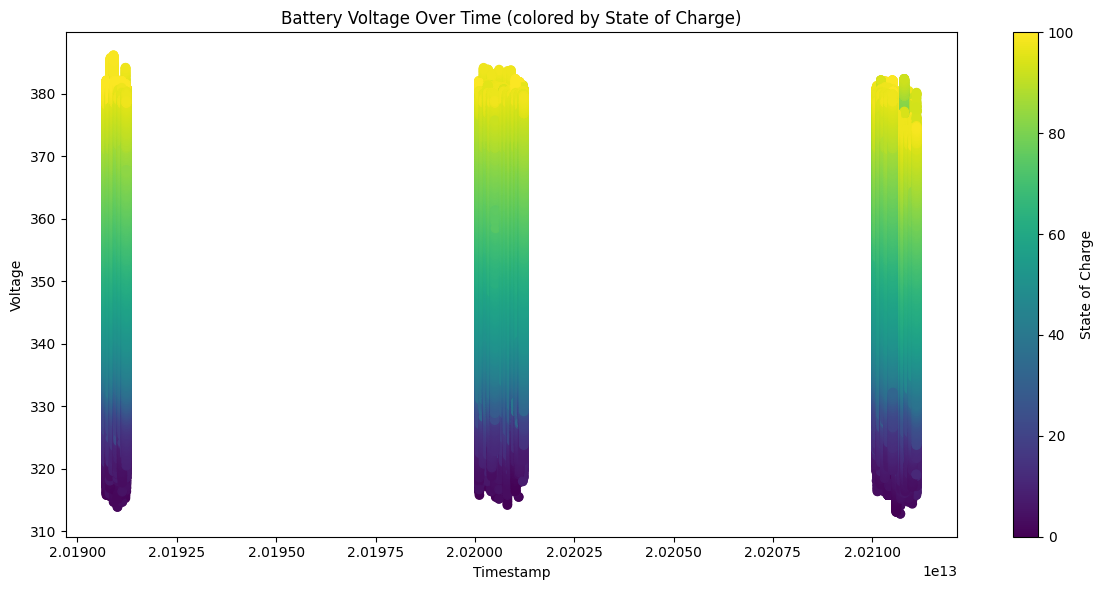

In [8]:
import matplotlib.pyplot as plt

def get_column_name(df, variants):
    for col in variants:
        if col in df.columns:
            return col
    return None

timestamp_col = get_column_name(df, ['record_time', 'timestamp', 'time', 'Time'])
voltage_col = get_column_name(df, ['pack_voltage (V)', 'voltage', 'battery_voltage', 'Voltage'])
soc_col = get_column_name(df, ['soc', 'state_of_charge', 'SOC'])

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
if timestamp_col and voltage_col:
    plt.scatter(df[timestamp_col], df[voltage_col],
                c=df[soc_col] if soc_col and soc_col in df.columns else np.zeros(len(df)), cmap='viridis')
    plt.xlabel("Timestamp")
    plt.ylabel("Voltage")
    plt.title("Battery Voltage Over Time (colored by State of Charge)")
    plt.colorbar(label="State of Charge")
    plt.tight_layout()
    plt.show()
else:
    print("Required columns for visualization not found.")

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade scipy
import numpy
import scipy
print(numpy.__version__)
print(scipy.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 17.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
2.0.2
1.14.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io as scio
import os
import shutil
from scipy.integrate import trapz
from scipy import interpolate
import datetime as dt
import csv
import zipfile
import seaborn as sns
import copy
import pyGPs
from sklearn.svm import SVR
from datetime import datetime
from natsort import ns, natsorted
# In[ Extract capacity and charging data]
def find_samples_in_file(file):
    cha = file
    cha.reset_index(drop=True, inplace=True)
    cha_time = []
    for i in range(len(cha)):
        cha_time.append(str(cha['record_time'][i]))
    cha_time = pd.to_datetime(np.array(cha_time))
    cha_time = pd.DataFrame(cha_time)

    aaa = cha_time.iloc[1:]
    aaa.reset_index(drop=True, inplace=True)
    bbb = cha_time.iloc[:-1]
    bbb.reset_index(drop=True, inplace=True)
    time_delta = (aaa - bbb)
    interval = dt.timedelta(seconds=10)

    rest_index = []
    for i in range(len(time_delta)):
        # i = 1
        if time_delta.iloc[i,0] > interval:
            rest_index.append(i)

    cha_list = []
    cha_list.append(cha.iloc[:rest_index[0]])
    for i in range(len(rest_index)-1):
        cha_cut = cha.iloc[rest_index[i]+1:rest_index[i+1]]
        cha_list.append(cha_cut)
    cha_list.append(cha.iloc[rest_index[-1]+1:])

    Ca_list = []
    cha_list_out = []
    for j in range(len(cha_list)):
        # j = 10
        cha_cut = cha_list[j]
        cha_cut.reset_index(drop=True, inplace=True)
        if len(cha_cut)<100:
            continue
        dif_soc = cha_cut['soc'][1:] - cha_cut['soc'][:-1]
        if np.sum(dif_soc>2) or np.sum(dif_soc<-0.1):
            continue
        time = []
        for i in range(len(cha_cut)):
            # i = 1
            time.append(str(cha_cut['record_time'][i]))
        time = np.array(time)
        time = pd.to_datetime(time)

        current = cha_cut['charge_current']
        soc = cha_cut['soc']
        Tmax= np.mean(cha_cut['max_temperature'])
        Tmin= np.mean(cha_cut['min_temperature'])
        # tem = cha_cut['vehoutsidetemp']
        label_Ca = real_capacity_cal(time,current,soc)
        if label_Ca==0:
            continue
        Ca_list.append([time[0],time[len(time)-1],soc[0],soc[len(time)-1],label_Ca,Tmax,Tmin])
        cha_list_out.append(cha_cut)

    return Ca_list,cha_list_out
def real_capacity_cal(time_data,current,SOC_data):
    if np.sum(np.isnan(current.tolist()))>len(current)*0.1:
        return []
    if np.sum(np.isnan(current.tolist())):
        for n in range(len(current)):
            if np.isnan(current[n]):
                current[n]=current[n-1]
    time_sec=np.zeros(len(current))
    for j in range(len(current)):
        time_temp = time_data[j] - time_data[0]
        time_sec[j]=time_temp.total_seconds()
    accumulated_Q=trapz(current,time_sec)/3600*(-1)
    delta_SOC=SOC_data[len(SOC_data)-1]-SOC_data[0]
    if delta_SOC==0:
        return 0
    label_Ca = accumulated_Q/delta_SOC*100
    return label_Ca
def func(file_path):
    src_path = file_path
    file = pd.read_csv(src_path)
    file.columns = ['number','record_time','soc','pack_voltage','charge_current','max_cell_voltage',
                    'min_cell_voltage','max_temperature','min_temperature','available_energy','available_capacity']
    file = file.sort_values(by='record_time')
    file.reset_index(drop=True, inplace=True)
    # file=file.dropna(axis=0,how='any') #exclude 'nan' data
    ca_list,cha_data_list = find_samples_in_file(file)
    return ca_list,cha_data_list #return Ca and charging data for every vehicle
if __name__ == '__main__':
    main_path='..\\vehicles\\'
    dird=os.listdir(main_path)
    dird=natsorted(dird,alg=ns.PATH)
    data_list=[]
    for veh in range(len(dird)):
    # for veh in range(1):
        try:
            print(veh,' vehicle_num:',dird[veh])
            file_path = main_path+dird[veh]
            data_list.append(func(file_path))
        except:
            print(veh,' ',dird[veh],'error')
# In[ Plot Capacity curves ]
from matplotlib import rcParams
params={'font.family':'serif',
        'font.serif':'Times New Roman',
        'font.style':'normal',
        'font.weight':'normal', #or 'blod'
        'font.size':12,#or large,small
        }
rcParams.update(params)
plt.figure(figsize=(16,16),dpi=600)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
        wspace=0.30, hspace=0.45)
for j in range(len(data_list)):
    veh_data = data_list[j]
    ca_list = veh_data[0]
    cha_list = veh_data[1]
    veh_df = pd.DataFrame(data=ca_list,columns=['time_s','time_e','SOC_s','SOC_e','charge_capacity','Tmax','Tmin'])
    plt.subplot(4,5,j+1)
    plt.plot(veh_df.iloc[:,0],veh_df.iloc[:,4],'o')
    plt.ylabel('Capacity (Ah)')
    plt.xlabel('Date')
    plt.ylim([90,150])
    plt.title('#'+str(j+1),x=0.1,y=0.1)
    plt.xticks(rotation=90)
plt.show()
# In[ Plot Capacity curves after stastical analysis]
from datetime import datetime
plt.figure(figsize=(16,16),dpi=600)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
    wspace=0.30, hspace=0.45)
for j in range(len(data_list)):
    veh_data = data_list[j]
    ca_list = veh_data[0]
    cha_list = veh_data[1]
    veh_df = pd.DataFrame(data=ca_list,columns=['time_s','time_e','SOC_s','SOC_e','charge_capacity','Tmax','Tmin'])
    veh_df.reset_index(drop=True, inplace=True)
    cnt=0
    time_index=[]
    time_index.append(veh_df.time_e[0])
    veh_name=cha_list[0].values[0,0]
    veh_df.reset_index(drop=True, inplace=True)
    cnt=0
    time_index=[]
    time_index.append(veh_df.time_e[0])
    ca_month=[]
    ca_temp=[]
    for i in range(len(veh_df)):
        if(veh_df.time_e[i].year==time_index[cnt].year)and(veh_df.time_e[i].month==time_index[cnt].month):
            ca_temp.append(veh_df.charge_capacity[i])
        else:
            ca_month.append(ca_temp)
            cnt=cnt+1
            time_index.append(veh_df.time_e[i])
            ca_temp=[]
            ca_temp.append(veh_df.charge_capacity[i])
    ca_month.append(ca_temp)
    print(j)
    veh_ca1 = [np.mean(p) for p in ca_month]
    veh_ca2 = [np.median(p) for p in ca_month]
    plt.subplot(4,5,j+1)
    plt.plot(time_index,veh_ca1)
    plt.plot(time_index,veh_ca2,'-.')
    # plt.title(dird[i].split('M')[-1])
    plt.title('#'+str(j+1),x=0.1,y=0.1)
    plt.xticks(rotation=90)
    plt.yticks(np.arange(110,135,6))
    plt.ylabel('Capacity (Ah)')
    plt.xlabel('Date')
    plt.legend(['Mean','Median'],loc=1)
plt.show()

ImportError: cannot import name '_center' from 'numpy._core.umath' (/usr/local/lib/python3.11/dist-packages/numpy/_core/umath.py)